# Sentiment analysis for US Airline twitter data. Dataset was picked from Kaggle datasets. 

In sentiment analysis we try to understand the opinion of the author/authors about a subject of discussion. Here, the subject of discussion is the quality of experience of the authors upon traveling through some of the US airlines. 

To perform the analysis, the opinions were categorized into positive which means that the users were satisfied with the qualtiy of the service, negative meaning that the users were not happy with the quality of the servie and neutral meaning that the users were neither very happy nor disappointed by the airline services. This helps in breaking the task to a classification problem which falls under the category of supervised machine learning. Thus, out of the **'lexicon or the rule based'** approach and the **'Automatic ML based'** approach we will explore the automated appraches of understanding the sentiment of the author and then predicting it as well.

In [1]:
cd drive/MyDrive/Natural Language Processing

/content/drive/MyDrive/Natural Language Processing


In [2]:
pwd

'/content/drive/MyDrive/Natural Language Processing'

# Step 1: Understanding the data. Data Exploration 

In [3]:
#importing the necessary packages
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('US_Airline_Tweets.csv')
data

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


In [5]:
data.airline_sentiment.unique() 

array(['neutral', 'positive', 'negative'], dtype=object)

In [6]:
# tweet id is not useful for analysis
data.airline_sentiment.value_counts()/len(data)

negative    0.626913
neutral     0.211680
positive    0.161407
Name: airline_sentiment, dtype: float64

In [7]:
print('The shape of the data is: ', data.shape) #total of 14640 reviews(tweets) and 15 features/columns
print('Number of classes/ polarity of opinions: ',len(data.airline_sentiment.unique() ))
print('Proportion of polarity: ',data.airline_sentiment.value_counts()/len(data)) 
print('Number of airlines in consideration:\n', data.airline.value_counts()/len(data))

The shape of the data is:  (14640, 15)
Number of classes/ polarity of opinions:  3
Proportion of polarity:  negative    0.626913
neutral     0.211680
positive    0.161407
Name: airline_sentiment, dtype: float64
Number of airlines in consideration:
 United            0.261066
US Airways        0.198975
American          0.188456
Southwest         0.165301
Delta             0.151776
Virgin America    0.034426
Name: airline, dtype: float64


In terms of the distribution of tweets per polarity, the data is unbalanced. Majority of the data accounts for negative reviews. Least proportion of data acounts for postive reviews. However, it seems the reviews/ tweets are fairly distributed aross the various airlines. Exept for Virgin America, which has the least number of reviews/tweets.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


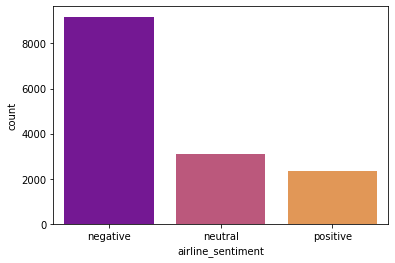

In [8]:
sns.countplot(data['airline_sentiment'], order =data.airline_sentiment.value_counts().index,palette= 'plasma')
plt.show()

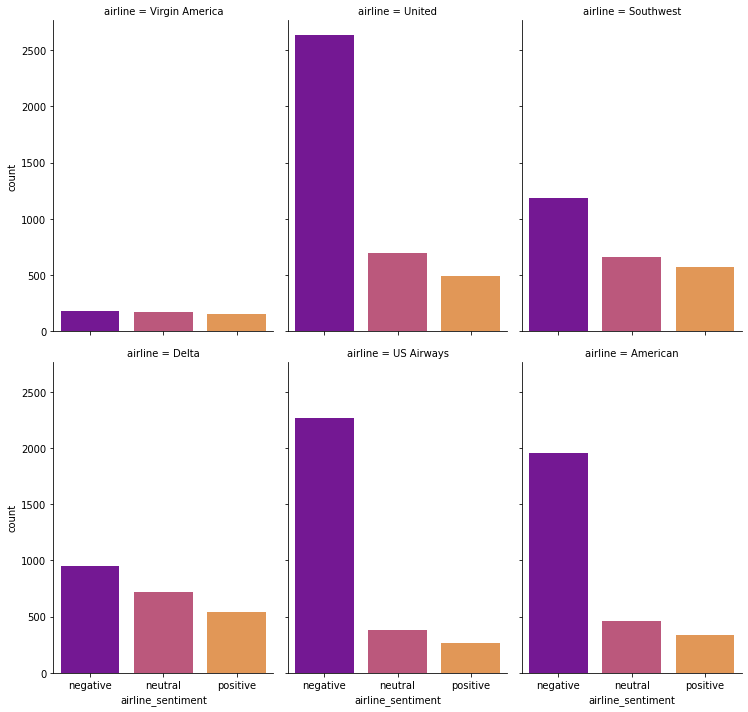

In [9]:
g = sns.FacetGrid(data, col="airline", col_wrap=3, height=5, aspect =0.7)
g = g.map(sns.countplot, "airline_sentiment",order =data.airline_sentiment.value_counts().index, palette='plasma')
plt.show()

Proportionately, all airlines have mostly negative reviews. Majorly, United and US airways has maximum difference in positive and negative reviews. 

In [10]:
data.retweet_count.value_counts() #canbe removed as a feature if the performance of the model has no positive effect.

0     13873
1       640
2        66
3        22
4        17
5         5
7         3
6         3
22        2
8         1
32        1
28        1
9         1
18        1
11        1
31        1
15        1
44        1
Name: retweet_count, dtype: int64

## detecting language of the tweets

Knowing the lannguage of the document is useful as preprocessing and feature extraction can be performed based on this information.  

We use the ***langdetect*** package to detect the language in every tweet as it is one of the better performing packages for the given purpose.

In [11]:
############# Note: ################
# At the time of creating this notebook, langdetect is not present in the colab environment.
# Thus, needs to manually installed
#please comment the code in case langdetect is supported by your colab environment

!pip install langdetect

     |████████████████████████████████| 981 kB 6.6 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=ad0dc0c0495f7686d13e04a18e82d79d5b8905142d3d1ccc30a3882cd879db24
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [12]:
from langdetect import detect_langs

tweet_lang = pd.Series([str(detect_langs(data['text'].iloc[i])[0]).split(':')[0] for i in range(len(data))])
tweet_lang.unique()

array(['en', 'it', 'nl', 'es', 'ro', 'pt', 'af', 'id', 'fr', 'tl', 'da',
       'de', 'et', 'so', 'no', 'pl', 'sq', 'sv', 'cy', 'tr', 'ca'],
      dtype=object)

In [13]:
olist = []
for i in range(len(data)):
  lang = str(detect_langs(data['text'].iloc[i])[0]).split(':')[0]
  if lang != 'en':
    olist.append(i)  

In [14]:
len(olist)

186

There are 200 entires where the detected language is not english. There could be some false alarms in this as well. Thus, these 200 entries need to be checked separately.

In [15]:
# !pip install langid

In [16]:
# import langid


In [17]:
# langid.classify(data['text'].iloc[8])

We tried a few other libraries that give a different result than the langdetect library. This was done in order to reduce manual work. pycld2 was found to one of the reliable libraries.  
Pycld2 python library is a python binding for the Compact Language Detect 2 (CLD2).

In [18]:
pip install pycld2

     |████████████████████████████████| 41.4 MB 1.2 MB/s 
  Created wheel for pycld2: filename=pycld2-0.41-cp37-cp37m-linux_x86_64.whl size=9834266 sha256=a40534a1bad93b01f702d04095af4975cb0036c7024d6df24ceb8ce6be5581c4
  Stored in directory: /root/.cache/pip/wheels/ed/e4/58/ed2e9f43c07d617cc81fe7aff0fc6e42b16c9cf6afe960b614
Successfully built pycld2


In [19]:
import pycld2 as cld2

In [20]:
for item in olist:
  text_content = data['text'].iloc[item]
  _, _, _, detected_language = cld2.detect(text_content,  returnVectors=True)
  if detected_language[0][-1] == 'en':
    olist.remove(item)
len(olist)

120

In [21]:
olist

[46,
 58,
 227,
 241,
 325,
 430,
 563,
 753,
 962,
 988,
 1106,
 1205,
 1669,
 1790,
 1832,
 2113,
 2135,
 2345,
 2607,
 2985,
 3236,
 3677,
 5574,
 5874,
 6516,
 6801,
 6833,
 6857,
 6888,
 6916,
 6946,
 6949,
 6953,
 6958,
 6960,
 6964,
 6976,
 6986,
 6992,
 6998,
 7015,
 7020,
 7023,
 7025,
 7033,
 7053,
 7068,
 7083,
 7089,
 7099,
 7108,
 7111,
 7117,
 7120,
 7126,
 7144,
 7154,
 7160,
 7161,
 7170,
 7173,
 7193,
 7214,
 7249,
 7305,
 7358,
 7405,
 7467,
 7472,
 7693,
 7740,
 7788,
 7807,
 7822,
 7842,
 7857,
 7993,
 8013,
 8144,
 8158,
 8211,
 8216,
 8243,
 8276,
 8299,
 8340,
 8452,
 8455,
 8465,
 8496,
 8558,
 8587,
 8626,
 8653,
 8681,
 8743,
 8874,
 8903,
 8911,
 8955,
 9205,
 9401,
 9578,
 10153,
 10486,
 10642,
 10696,
 10795,
 11257,
 11576,
 11604,
 11771,
 12066,
 12188,
 12294,
 12332,
 12535,
 12666,
 13253,
 13390]

In [22]:
data['text'].iloc[olist]

46       @VirginAmerica  DREAM http://t.co/oA2dRfAoQ2 h...
58       @VirginAmerica @ladygaga @carrieunderwood - Ca...
227             @VirginAmerica Like http://t.co/VPqEm31XUQ
241                           @virginamerica spruce moose!
325                    @VirginAmerica momma I made it! 😁😁😁
                               ...                        
12332                 @AmericanAir ...2/2 doesn't help me.
12535                         @AmericanAir *does = doesn't
12666                                  @AmericanAir yikes.
13253        @AmericanAir I DM'd you. Anything you can do?
13390    @AmericanAir BRING MY FIANCÉ @meerikangas BACK...
Name: text, Length: 120, dtype: object

Manual analysis reveals all texts are in english. Some tweets contained URLs, too many special characters, smileys or were too short for the libraries to correctly detect a language.  
Since all the tweets are in english, we can proceed with further steps.

## getting the text features in a uniform case (lower)

In [23]:
data['text'] = data.text.apply(str.lower)
data

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@virginamerica what @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@virginamerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@virginamerica i didn't today... must mean i n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@virginamerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@virginamerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@americanair thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@americanair leaving over 20 minutes late flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@americanair please bring american airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@americanair you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


## Checking the length of Tweets

In [24]:
len_tweets = data.text.str.len()
print('maximum length of the tweet: ',max(len_tweets))
print('minimum length of the tweet: ',min(len_tweets))
print('average length of the tweet: ',len_tweets.mean())
print('median length of the tweet: ',len_tweets.median())

maximum length of the tweet:  186
minimum length of the tweet:  12
average length of the tweet:  103.82206284153006
median length of the tweet:  114.0


# Step 2: Cleaning the data

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

negative reason is not present for all the reviews and is even missing for reviews with negative sentiment. Hence, it is excluded along with negative_reason confidennce.  
There are too many null values in airline sentiment gold, negative reason gold, tweet coord, tweet location and user timezone. Hence, they is excluded as features. Name as features are maintained as there can be some users who are biased towards a particular airline or all of the airlines on the whole. Thus, names as features could prove useful in sentiment prediction of the tweet.  
The time when tweet is created might not have an impact on the actual airline experience of the user. Hence, it is excluded.


In [26]:
print('Number of unique users writing the reviews: ',len(data.name.unique())) 

Number of unique users writing the reviews:  7701


In [27]:
data.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [28]:
clean_data = data.drop(['tweet_id' , 'negativereason', 'negativereason_confidence',
       'airline_sentiment_gold', 'negativereason_gold', 'tweet_coord',
       'tweet_location', 'user_timezone','tweet_created'],axis = 1)

clean_data

,airline_sentiment,airline_sentiment_confidence,airline,name,retweet_count,text
0,neutral,1.0000,Virgin America,cairdin,0,@virginamerica what @dhepburn said.
1,positive,0.3486,Virgin America,jnardino,0,@virginamerica plus you've added commercials t...
2,neutral,0.6837,Virgin America,yvonnalynn,0,@virginamerica i didn't today... must mean i n...
3,negative,1.0000,Virgin America,jnardino,0,@virginamerica it's really aggressive to blast...
4,negative,1.0000,Virgin America,jnardino,0,@virginamerica and it's a really big bad thing...
...,...,...,...,...,...,...
14635,positive,0.3487,American,KristenReenders,0,@americanair thank you we got on a different f...
14636,negative,1.0000,American,itsropes,0,@americanair leaving over 20 minutes late flig...
14637,neutral,1.0000,American,sanyabun,0,@americanair please bring american airlines to...
14638,negative,1.0000,American,SraJackson,0,"@americanair you have my money, you change my ..."


## Getting the features in the right format. (Except for the actual tweet)

### Handling emojis/emoticons, urls, hastags and mentions using annotation

In [29]:
!pip install ftfy
!pip install emot

     |████████████████████████████████| 53 kB 1.2 MB/s 
     |████████████████████████████████| 61 kB 16 kB/s 


In [30]:
import ftfy
import re
import pickle
from emot.emo_unicode import UNICODE_EMOJI # For emojis
from emot.emo_unicode import EMOTICONS_EMO # For EMOTICONS

In [31]:
# example =  'Virgin America momma I made it! 😁😁😁'
# example2 = '😁'

In [32]:
# t = annot_emojis(example)
# t

In [33]:
# test = 'Good morning ;-)'
# x = annot_emoticons(test)
# x

In [34]:
# re.sub(r' or.*','','Wink or happy face or a potato im not sure. 1234')

In [35]:
hashtag_re = re.compile(r"#\w+")
mention_re = re.compile(r"@\w+")
url_re = re.compile(r"(?:https?://)?(?:[-\w]+\.)+[a-zA-Z]{2,9}[-\w/#~:;.?+=&%@~]*")

def annot_emojis(text):
  for emo in UNICODE_EMOJI:
    text = text.replace(emo, '['+"_".join(UNICODE_EMOJI[emo].replace(",","").replace(':','').split())+']')
  return text

def annot_emoticons(text):
  for con in EMOTICONS_EMO:
    text = text.replace(con, re.sub(r'.or.*', '', '['+"_".join(EMOTICONS_EMO[con].replace(',','').split()))+']')
  return text

def preprocess(text):
    p_text = hashtag_re.sub("[hashtag]",text)
    p_text = mention_re.sub("[mention]",p_text)
    p_text = url_re.sub("[url]",p_text)
    p_text = ftfy.fix_text(p_text)
    p_text = annot_emojis(p_text)
    p_text = annot_emoticons(p_text)
    return p_text

In [36]:
clean_data.text = clean_data.text.apply(preprocess)
clean_data

,airline_sentiment,airline_sentiment_confidence,airline,name,retweet_count,text
0,neutral,1.0000,Virgin America,cairdin,0,[mention] what [mention] said.
1,positive,0.3486,Virgin America,jnardino,0,[mention] plus you've added commercials to the...
2,neutral,0.6837,Virgin America,yvonnalynn,0,[mention] i didn't today... must mean i need t...
3,negative,1.0000,Virgin America,jnardino,0,[mention] it's really aggressive to blast obno...
4,negative,1.0000,Virgin America,jnardino,0,[mention] and it's a really big bad thing abou...
...,...,...,...,...,...,...
14635,positive,0.3487,American,KristenReenders,0,[mention] thank you we got on a different flig...
14636,negative,1.0000,American,itsropes,0,[mention] leaving over 20 minutes late flight....
14637,neutral,1.0000,American,sanyabun,0,[mention] please bring american airlines to [h...
14638,negative,1.0000,American,SraJackson,0,"[mention] you have my money, you change my fli..."


In [37]:
clean_data.text[46]

'[mention]  dream [url] [url]'

In [38]:
clean_data.text[325]

'[mention] momma i made it! [beaming_face_with_smiling_eyes][beaming_face_with_smiling_eyes][beaming_face_with_smiling_eyes]'

In [39]:
clean_data.text[8970]

'[mention] just hung up on me again.  another waste of an hour of my time.  how am i supposed to book a one way award flight?  [hashtag]'

### Label encoding

In [40]:
def get_numeric_features(df, features): #code for label encoding of certain text based features
  for feature in features:
    temps = set(df[feature])

    temp_dict = {}
    count = 0
    for temp in temps:
      temp_dict[temp] = count
      count += 1

    temp_list = [temp_dict[df[feature].iloc[i]] for i in range(len(df))]
    df[feature] = temp_list

feature_list = ['airline_sentiment','airline','name']
get_numeric_features(clean_data,feature_list)
clean_data

,airline_sentiment,airline_sentiment_confidence,airline,name,retweet_count,text
0,2,1.0000,2,5705,0,[mention] what [mention] said.
1,0,0.3486,2,2194,0,[mention] plus you've added commercials to the...
2,2,0.6837,2,7567,0,[mention] i didn't today... must mean i need t...
3,1,1.0000,2,2194,0,[mention] it's really aggressive to blast obno...
4,1,1.0000,2,2194,0,[mention] and it's a really big bad thing abou...
...,...,...,...,...,...,...
14635,0,0.3487,4,4269,0,[mention] thank you we got on a different flig...
14636,1,1.0000,4,4283,0,[mention] leaving over 20 minutes late flight....
14637,2,1.0000,4,577,0,[mention] please bring american airlines to [h...
14638,1,1.0000,4,3579,0,"[mention] you have my money, you change my fli..."


In [41]:
clean_data.info() #no missing data or null values,features are transformed to the right format, except for the  actual tweet.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   airline_sentiment             14640 non-null  int64  
 1   airline_sentiment_confidence  14640 non-null  float64
 2   airline                       14640 non-null  int64  
 3   name                          14640 non-null  int64  
 4   retweet_count                 14640 non-null  int64  
 5   text                          14640 non-null  object 
dtypes: float64(1), int64(4), object(1)
memory usage: 686.4+ KB


# Step3: Feature Extraction

For the ML models to perform well, we introduce more features. We use basic features like length of the tweet (generally, more the length of the tweet more emotionally charged it is) and some special features like valence scores. We can form a feature out of number of sentences in the tweet or number of punctuations in the tweet. However, tweets are not written like normal script and could also contain smileys and excessive use of special characters. Essentially number of sentences and punctuation marks also work like the length of the tweet so we can ignore these features and include just the length of tweet as a feature.  
Valence scores are used by lexicon based techniques of sentiment analysis. Thus, valence scores could prove to be important features in ML approach as well. 
valence scores are of two types polarity and subjectivity. We use Textblob library to generate the valence scores for each tweet.

## Length of review as a feature

In [42]:
# Import the word tokenizing package
import nltk
from nltk import word_tokenize

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [43]:
# Tokenize each item in the review column 
word_tokens = [word_tokenize(review) for review in clean_data.text]

# Print out the first item of the word_tokens list
print(word_tokens[0])

# Create an empty list to store the length of reviews
len_tokens = []

# Iterate over the word_tokens list and determine the length of each item
for i in range(len(word_tokens)):
     len_tokens.append(len(word_tokens[i]))

# Create a new feature for the lengh of each review
clean_data['length'] = len_tokens
clean_data

['[', 'mention', ']', 'what', '[', 'mention', ']', 'said', '.']


,airline_sentiment,airline_sentiment_confidence,airline,name,retweet_count,text,length
0,2,1.0000,2,5705,0,[mention] what [mention] said.,9
1,0,0.3486,2,2194,0,[mention] plus you've added commercials to the...,14
2,2,0.6837,2,7567,0,[mention] i didn't today... must mean i need t...,17
3,1,1.0000,2,2194,0,[mention] it's really aggressive to blast obno...,23
4,1,1.0000,2,2194,0,[mention] and it's a really big bad thing abou...,13
...,...,...,...,...,...,...,...
14635,0,0.3487,4,4269,0,[mention] thank you we got on a different flig...,14
14636,1,1.0000,4,4283,0,[mention] leaving over 20 minutes late flight....,28
14637,2,1.0000,4,577,0,[mention] please bring american airlines to [h...,11
14638,1,1.0000,4,3579,0,"[mention] you have my money, you change my fli...",31


## valence scores as features

In [44]:
from textblob import TextBlob

In [45]:
polarity = []
subjectivity = []
for i in range(len(clean_data)):
  blob = TextBlob(clean_data.text.iloc[i])
  polarity.append(blob.sentiment[0])
  subjectivity.append(blob.sentiment[1])
clean_data['polarity'],clean_data['subjectivity'] = polarity, subjectivity
clean_data

,airline_sentiment,airline_sentiment_confidence,airline,name,retweet_count,text,length,polarity,subjectivity
0,2,1.0000,2,5705,0,[mention] what [mention] said.,9,0.000000,0.000000
1,0,0.3486,2,2194,0,[mention] plus you've added commercials to the...,14,0.000000,0.000000
2,2,0.6837,2,7567,0,[mention] i didn't today... must mean i need t...,17,-0.390625,0.687500
3,1,1.0000,2,2194,0,[mention] it's really aggressive to blast obno...,23,0.006250,0.350000
4,1,1.0000,2,2194,0,[mention] and it's a really big bad thing abou...,13,-0.350000,0.383333
...,...,...,...,...,...,...,...,...,...
14635,0,0.3487,4,4269,0,[mention] thank you we got on a different flig...,14,0.000000,0.600000
14636,1,1.0000,4,4283,0,[mention] leaving over 20 minutes late flight....,28,-0.300000,0.600000
14637,2,1.0000,4,577,0,[mention] please bring american airlines to [h...,11,0.000000,0.000000
14638,1,1.0000,4,3579,0,"[mention] you have my money, you change my fli...",31,-0.125000,0.375000


## Word Cloud for Analysis

In [46]:
from wordcloud import WordCloud, STOPWORDS

Apart from default stop words twitter handles of all the airlines and some other words have also been added to the list of stop words.

In [47]:
cloud_stop = set(STOPWORDS)
cloud_stop.update(['@','hashtag','mention','url','airline','airplane','plane','am','pm','virginamerica','americanair','jetblue','southwestair','united','usairways','flight'])

In [48]:
all_reviews = clean_data.text.str.cat(sep= ' ')
all_reviews

'[mention] what [mention] said. [mention] plus you\'ve added commercials to the experience... tacky. [mention] i didn\'t today... must mean i need to take another trip! [mention] it\'s really aggressive to blast obnoxious "entertainment" in your guests\' faces & they have little recourse [mention] and it\'s a really big bad thing about it [mention] seriously would pay $30 a flight for seats that didn\'t have this playing.\nit\'s really the only bad thing about flying va [mention] yes, nearly every time i fly vx this "ear worm" won\'t go away [Happy_face] [mention] really missed a prime opportunity for men without hats parody, there. [url] [mention] well, i didn\'t…but now i do! :-d [mention] it was amazing, and arrived an hour early. you\'re too good to me. [mention] did you know that suicide is the second leading cause of death among teens 10-24 [mention] i <3 pretty graphics. so much better than minimal iconography. :d [mention] this is such a great deal! already thinking about my 2n

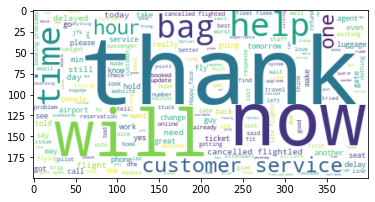

In [49]:
#Word Cloud for all the reviews
cloud = WordCloud(background_color='white', stopwords=cloud_stop).generate(all_reviews)
plt.imshow(cloud, interpolation= 'bilinear')
plt.show()

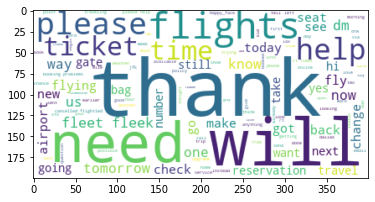

In [50]:

neg_reviews = clean_data[clean_data.airline_sentiment == 2].text.str.cat(sep= ' ')

#Word Cloud for all the negative reviews
cloud = WordCloud(background_color='white', stopwords=cloud_stop).generate(neg_reviews)
plt.imshow(cloud, interpolation= 'bilinear')
plt.show()

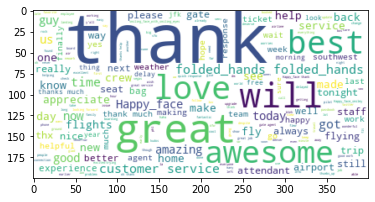

In [51]:

neu_reviews = clean_data[clean_data.airline_sentiment == 0].text.str.cat(sep= ' ')

#Word Cloud for all the negative reviews
cloud = WordCloud(background_color='white', stopwords=cloud_stop).generate(neu_reviews)
plt.imshow(cloud, interpolation= 'bilinear')
plt.show()

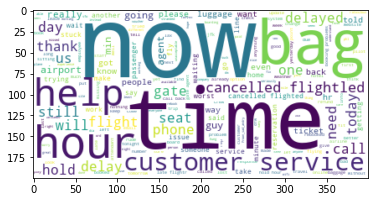

In [52]:

pos_reviews = clean_data[clean_data.airline_sentiment == 1].text.str.cat(sep= ' ')

#Word Cloud for all the negative reviews
cloud = WordCloud(background_color='white', stopwords=cloud_stop).generate(pos_reviews)
plt.imshow(cloud, interpolation= 'bilinear')
plt.show()

## Tokenizing 

We wil only consider word tokens so as to keep a limit to the vocabulary in consideration.

In [53]:
# Import the word tokenizing package
from nltk import word_tokenize

# Tokenize the text column
word_tokens = [word_tokenize(review) for review in clean_data.text]
print('Original tokens: ', word_tokens[0])

# Filter out non-letter characters
cleaned_tokens = [[word for word in item if word.isalpha()] for item in word_tokens]
print('Cleaned tokens: ', cleaned_tokens[0])

Original tokens:  ['[', 'mention', ']', 'what', '[', 'mention', ']', 'said', '.']
Cleaned tokens:  ['mention', 'what', 'mention', 'said']


## Lemmatization

In [54]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [55]:
lem = WordNetLemmatizer()
lemmatized_tokens = [[lem.lemmatize(word) for word in token] for token in cleaned_tokens]
print('clean tokens:', cleaned_tokens[1])
print('lemmatized tokens:', lemmatized_tokens[1])

clean tokens: ['mention', 'plus', 'you', 'added', 'commercials', 'to', 'the', 'experience', 'tacky']
lemmatized tokens: ['mention', 'plus', 'you', 'added', 'commercial', 'to', 'the', 'experience', 'tacky']


In [56]:
lemmatized_text = [' '.join(token) for token in lemmatized_tokens] # joining the tokens so formed to create further features.
clean_data['text'] = lemmatized_text
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   airline_sentiment             14640 non-null  int64  
 1   airline_sentiment_confidence  14640 non-null  float64
 2   airline                       14640 non-null  int64  
 3   name                          14640 non-null  int64  
 4   retweet_count                 14640 non-null  int64  
 5   text                          14640 non-null  object 
 6   length                        14640 non-null  int64  
 7   polarity                      14640 non-null  float64
 8   subjectivity                  14640 non-null  float64
dtypes: float64(3), int64(5), object(1)
memory usage: 1.0+ MB


Lemmatization is relatively slower than stemming. Also at the end we get comparable results with both stemming and lemmatization.

## Stemming

Converting the words to their root form. We consider and not lemmatization as the process of stemming using nltk package is much faster than the process of lemmatization.

Thus, only root form of words will be used to create further features for sentiment analysis and prediction. Stemming and lemmatization need to be performed for every word or every word token.

There are multiple options for stemming in nltk package like PorterStemmer, SnowballStemmer, LanasterStemmer, etc.

LancasterStemmer is considered to be very aggressive stemmer and PorterStemmer is considered to be the default/standard choice, SnowballStemmer is usually a preferred choice as it is fast and can support multiple languages. Hence, we use snowball stemmer in our use case.

In [57]:
from nltk.stem.snowball import SnowballStemmer

In [58]:
stemmer = SnowballStemmer('english')
stemmed_tokens = [[stemmer.stem(word) for word in token] for token in cleaned_tokens]
print('clean tokens:', cleaned_tokens[1])
print('stemmed tokens:', stemmed_tokens[1])

clean tokens: ['mention', 'plus', 'you', 'added', 'commercials', 'to', 'the', 'experience', 'tacky']
stemmed tokens: ['mention', 'plus', 'you', 'ad', 'commerci', 'to', 'the', 'experi', 'tacki']


In [59]:
stemmed_text = [' '.join(token) for token in stemmed_tokens] # joining the tokens so formed to create further features.
clean_data['text'] = stemmed_text
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   airline_sentiment             14640 non-null  int64  
 1   airline_sentiment_confidence  14640 non-null  float64
 2   airline                       14640 non-null  int64  
 3   name                          14640 non-null  int64  
 4   retweet_count                 14640 non-null  int64  
 5   text                          14640 non-null  object 
 6   length                        14640 non-null  int64  
 7   polarity                      14640 non-null  float64
 8   subjectivity                  14640 non-null  float64
dtypes: float64(3), int64(5), object(1)
memory usage: 1.0+ MB


## Bag of Words

One of the standard approaches to transform text to numeric data. It builds a vocabulary of words ocuring in a document and keeps track of the frequeny of the words in the vocabulary. From word cloud we got all the words of interest. BOW will check the frequency of words (of our interest along with other words) and thus, can be used a feature for sentiment prediction.

In [60]:
from sklearn.feature_extraction.text import CountVectorizer,ENGLISH_STOP_WORDS

In [61]:
stop1 = ['@','airline','airplane','plane','am','pm','flight']
stops = [stemmer.stem(word) for word in stop1]
stops = ENGLISH_STOP_WORDS.union(stops) #stopwords for creating the features



In [62]:
stemmer.stem('hashtag')

'hashtag'

We set some limits to the number of features to avoid over fitting. We also consider bi-grams to capture the context in the tweets.

In [63]:
vect = CountVectorizer(max_features=250,ngram_range=(1,3),stop_words=stops).fit(clean_data.text)
X= vect.transform(clean_data.text)
BOW = pd.DataFrame(X.toarray(),columns= vect.get_feature_names())
BOW

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aa,abl,actual,agent,ago,air,airport,alreadi,alway,amaz,...,websit,week,whi,wifi,wo,work,worst,year,yes,yesterday
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14636,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14637,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14638,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## TfIdf

**Term Frequency**: How often a given word within a document/tweet in the corpus/ all the tweets.
**Inverse Document Frequency**: Log ratio between the total number of documents and the number of documents that contain a specific word. Helps in quantifying the words that do not occur frequently.  

***TfIdf = term frequency x inverse document frequency***  

TfIdf unlike BOW takes into account the length of the review. It highlights words that are common within a document/tweet but not accross all the documents/tweets.

For TfIdf we need not explicitly define stop words but can still be used to limit vocabulary


In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [65]:
vect = TfidfVectorizer(max_features=250,ngram_range=(1,3)).fit(clean_data.text)
X= vect.transform(clean_data.text)
names = [feature+'_tfidf' for feature in vect.get_feature_names()]
tfidf = pd.DataFrame(X.toarray(),columns= names)
tfidf


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,about_tfidf,after_tfidf,again_tfidf,agent_tfidf,airlin_tfidf,airport_tfidf,all_tfidf,am_tfidf,an_tfidf,an hour_tfidf,...,will_tfidf,with_tfidf,work_tfidf,worst_tfidf,would_tfidf,yes_tfidf,you_tfidf,you guy_tfidf,you have_tfidf,your_tfidf
0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
1,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.294832,0.0,0.000000,0.000000
2,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
3,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.310621
4,0.479513,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.197814,0.0,0.000000,0.000000
14636,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
14637,0.000000,0.0,0.0,0.0,0.613486,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
14638,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.262039,0.0,0.285178,0.176592


In [66]:
final_data = pd.concat([clean_data,BOW,tfidf],axis =1)
final_data

,airline_sentiment,airline_sentiment_confidence,airline,name,retweet_count,text,length,polarity,subjectivity,aa,...,will_tfidf,with_tfidf,work_tfidf,worst_tfidf,would_tfidf,yes_tfidf,you_tfidf,you guy_tfidf,you have_tfidf,your_tfidf
0,2,1.0000,2,5705,0,mention what mention said,9,0.000000,0.000000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
1,0,0.3486,2,2194,0,mention plus you ad commerci to the experi tacki,14,0.000000,0.000000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.294832,0.0,0.000000,0.000000
2,2,0.6837,2,7567,0,mention i did today must mean i need to take a...,17,-0.390625,0.687500,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
3,1,1.0000,2,2194,0,mention it realli aggress to blast obnoxi ente...,23,0.006250,0.350000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.310621
4,1,1.0000,2,2194,0,mention and it a realli big bad thing about it,13,-0.350000,0.383333,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,0,0.3487,4,4269,0,mention thank you we got on a differ flight to...,14,0.000000,0.600000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.197814,0.0,0.000000,0.000000
14636,1,1.0000,4,4283,0,mention leav over minut late flight no warn or...,28,-0.300000,0.600000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
14637,2,1.0000,4,577,0,mention pleas bring american airlin to hashtag,11,0.000000,0.000000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
14638,1,1.0000,4,3579,0,mention you have my money you chang my flight ...,31,-0.125000,0.375000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.262039,0.0,0.285178,0.176592


In [67]:
final_data=final_data.drop(['text','name'],axis=1)
final_data

,airline_sentiment,airline_sentiment_confidence,airline,retweet_count,length,polarity,subjectivity,aa,abl,actual,...,will_tfidf,with_tfidf,work_tfidf,worst_tfidf,would_tfidf,yes_tfidf,you_tfidf,you guy_tfidf,you have_tfidf,your_tfidf
0,2,1.0000,2,0,9,0.000000,0.000000,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
1,0,0.3486,2,0,14,0.000000,0.000000,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.294832,0.0,0.000000,0.000000
2,2,0.6837,2,0,17,-0.390625,0.687500,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
3,1,1.0000,2,0,23,0.006250,0.350000,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.310621
4,1,1.0000,2,0,13,-0.350000,0.383333,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,0,0.3487,4,0,14,0.000000,0.600000,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.197814,0.0,0.000000,0.000000
14636,1,1.0000,4,0,28,-0.300000,0.600000,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
14637,2,1.0000,4,0,11,0.000000,0.000000,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
14638,1,1.0000,4,0,31,-0.125000,0.375000,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.262039,0.0,0.285178,0.176592


# Step4: Classification

**assumption**: altough all the text data has been transformed to numeric data. We take the libery to assume all the features as continuous numeric features to save on computation complexity.

## Preprocessing (standardization, local outlier removal normalization)

### Standardization and removal of global outliers

In [68]:
def standardize(df,cols): #Code to standardize the features
    temp=df.copy()
    for col in cols:
    # for col in temp.columns:
      temp[col] = (temp[col]-temp[col].mean())/temp[col].std()
    return temp

def destandardize(df1,df2):
    temp = df1.copy()
    for col in temp.columns:
        temp[col] = (temp[col]*df2[col].std())+df2[col].mean()
    return temp

def normalize(df,cols):
    temp = df.copy()
    for clm in temp.columns:
        temp[clm]=(2*((temp[clm]-temp[clm].min()))/(temp[clm].max()-temp[clm].min()))-1
    return temp

Standardize

In [69]:
cols = ['airline','airline_sentiment_confidence','retweet_count','length','polarity','subjectivity'] #,'name'
X_scaled = standardize(final_data,cols)
X_scaled[abs(X_scaled)>3].count()

airline_sentiment                 0
airline_sentiment_confidence    236
airline                           0
retweet_count                    61
length                            9
                               ... 
yes_tfidf                         0
you_tfidf                         0
you guy_tfidf                     0
you have_tfidf                    0
your_tfidf                        0
Length: 507, dtype: int64

 Detect and remove global outliers

Multiple points lie outside the [-3,3] range for each feature. As we have enough data points for training and validation phases of modelling we can eliminate these outliers.

In [70]:
X_scaled[abs(X_scaled)>3].describe()

,airline_sentiment,airline_sentiment_confidence,airline,retweet_count,length,polarity,subjectivity,aa,abl,actual,...,will_tfidf,with_tfidf,work_tfidf,worst_tfidf,would_tfidf,yes_tfidf,you_tfidf,you guy_tfidf,you have_tfidf,your_tfidf
count,0.0,236.000000,0.0,61.000000,9.000000,213.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,-3.348810,NaN,9.517143,5.729645,-3.257370,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,0.073284,NaN,11.209287,3.968313,0.031509,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,-3.470914,NaN,3.911820,3.182840,-3.263945,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,-3.398293,NaN,3.911820,3.307412,-3.263945,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,-3.367125,NaN,5.252701,3.930272,-3.263945,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,-3.298802,NaN,7.934464,5.923424,-3.263945,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,-3.125155,NaN,58.887954,14.892607,-3.069716,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
def remove_outliers(df1_scaled):
    df1_no_out = df1_scaled.copy()
    for clm in df1_no_out.columns:
        df1_no_out.drop(df1_no_out[abs(df1_no_out[clm])>3].index,inplace=True)
    return df1_no_out

In [72]:
X_removed = remove_outliers(X_scaled)
print('Number of outliers removed:', X_scaled.shape[0]-X_removed.shape[0])
X_removed.shape

Number of outliers removed: 687


(13953, 507)

In [73]:
X_removed = X_scaled.copy()

In [74]:
y = X_removed['airline_sentiment']
X_rem = X_removed.drop(['airline_sentiment'], axis=1)

Normalization

In [162]:
X_norm = normalize(X_rem,cols)
X_norm

,airline_sentiment_confidence,airline,retweet_count,length,polarity,subjectivity,aa,abl,actual,agent,...,will_tfidf,with_tfidf,work_tfidf,worst_tfidf,would_tfidf,yes_tfidf,you_tfidf,you guy_tfidf,you have_tfidf,your_tfidf
0,1.000000,-0.2,-1.0,-0.928058,0.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.0,-1.000000,-1.000000
1,-0.959098,-0.2,-1.0,-0.856115,0.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.360394,-1.0,-1.000000,-1.000000
2,0.048722,-0.2,-1.0,-0.812950,-0.390625,0.375000,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.0,-1.000000,-1.000000
3,1.000000,-0.2,-1.0,-0.726619,0.006250,-0.300000,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.0,-1.000000,-0.349267
4,1.000000,-0.2,-1.0,-0.870504,-0.350000,-0.233333,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.0,-1.000000,-1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,-0.958797,0.6,-1.0,-0.856115,0.000000,0.200000,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.570864,-1.0,-1.000000,-1.000000
14636,1.000000,0.6,-1.0,-0.654676,-0.300000,0.200000,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.0,-1.000000,-1.000000
14637,1.000000,0.6,-1.0,-0.899281,0.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.0,-1.000000,-1.000000
14638,1.000000,0.6,-1.0,-0.611511,-0.125000,-0.250000,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.431534,-1.0,-0.275494,-0.630051


### Dimensionality Reduction using PCA

In [76]:
from sklearn.decomposition import PCA

In [163]:
pca = PCA(0.80) # We continue with
pca.fit(X_norm)
coefficients = pd.DataFrame(pca.components_)
coefficients.columns = X_norm.columns
coefficients

,airline_sentiment_confidence,airline,retweet_count,length,polarity,subjectivity,aa,abl,actual,agent,...,will_tfidf,with_tfidf,work_tfidf,worst_tfidf,would_tfidf,yes_tfidf,you_tfidf,you guy_tfidf,you have_tfidf,your_tfidf
0,-0.107181,0.886719,0.001370,-0.020785,0.009336,-0.309486,0.005951,-0.002876,0.002687,-0.002962,...,-0.000583,-0.008951,-0.000742,-0.011955,-0.003146,0.002420,-0.002109,-0.000409,-0.000351,-0.010627
1,0.113936,0.338599,0.000881,0.030154,0.023793,0.898722,0.002410,0.007122,-0.001153,0.014089,...,-0.000636,0.011842,0.005772,0.026940,0.008950,-0.003014,0.008880,0.010134,0.002896,0.022636
2,-0.490560,-0.272448,0.004279,-0.037924,0.100987,0.136687,-0.005689,0.001018,-0.005514,-0.017771,...,0.006095,-0.004891,-0.001179,-0.004416,0.004461,0.003724,0.011254,-0.003019,-0.003142,-0.006642
3,0.343390,-0.077989,0.005602,0.040956,-0.114452,0.050502,-0.001210,-0.002065,-0.004026,0.008619,...,-0.018258,-0.003658,-0.006819,0.009982,-0.010010,-0.010379,-0.062458,-0.006635,-0.003812,-0.003852
4,-0.604497,0.023964,-0.001628,0.001373,0.088679,0.148803,0.001829,0.006106,-0.005015,-0.010818,...,0.009354,-0.008771,-0.008103,-0.011054,0.006654,0.003568,0.007205,-0.006971,-0.001724,-0.032892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,-0.004115,-0.000190,-0.003440,-0.013626,-0.054855,0.003806,0.000089,-0.032316,0.017650,0.009360,...,0.079883,-0.041447,-0.001145,-0.007096,-0.068741,0.001628,-0.028831,-0.021176,-0.029910,0.029803
174,0.007577,0.005851,0.000227,0.037293,0.005186,-0.000618,-0.004834,-0.005425,0.007395,-0.009797,...,0.133438,0.002774,-0.002653,0.012703,0.042114,0.000529,-0.071323,-0.052753,-0.027534,0.016782
175,0.000006,0.004895,0.000300,0.013904,-0.025209,-0.010202,-0.004792,-0.014989,-0.065502,-0.005079,...,-0.055896,-0.016855,0.015769,0.003107,0.126151,-0.002606,0.071231,0.070316,0.046576,0.000953
176,-0.008539,-0.004278,0.002866,-0.009355,0.007517,0.003574,-0.014252,0.006577,-0.032094,-0.013818,...,-0.034109,0.003146,0.002063,-0.006793,-0.039327,0.003805,0.040979,0.011080,0.012759,-0.022928


In [164]:
pcafeatures= ['PC'+ str(i) for i in range (0,coefficients.shape[0])]
transformedData = pd.DataFrame(pca.transform ( X_norm ))
transformedData.columns = pcafeatures
transformedData

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC168,PC169,PC170,PC171,PC172,PC173,PC174,PC175,PC176,PC177
0,0.040780,-0.710274,-0.094505,-0.052098,-0.364706,-0.013010,-0.158253,-0.158685,-0.174318,-0.229510,...,-0.187662,0.030929,-0.016842,0.071789,-0.089026,0.045696,-0.015663,0.051633,0.060206,0.025181
1,0.180180,-0.835657,0.831940,-0.758867,0.829975,-0.485648,0.489161,-0.041528,-0.003759,-0.155252,...,0.044556,-0.046589,-0.025606,-0.269608,-0.048150,-0.146277,0.287191,0.254098,0.002751,-0.025176
2,-0.351389,0.397856,0.412289,-0.217712,0.473850,-0.401070,0.178167,0.050526,-0.129174,-0.043193,...,0.150042,-0.261190,-0.149607,0.325274,0.214951,-0.260561,0.125875,0.221844,0.090477,0.088337
3,-0.225195,-0.003509,-0.070668,-0.016163,-0.288093,-0.112554,-0.163128,-0.028962,-0.319110,-0.050252,...,-0.055700,0.005965,0.035325,0.030512,-0.056358,0.059931,-0.041098,0.019237,-0.121510,-0.040274
4,-0.239442,0.041816,-0.065466,0.018849,-0.287832,-0.082532,-0.125570,-0.059463,-0.310444,-0.137638,...,0.020735,0.066898,-0.129254,-0.009991,0.038684,-0.071984,-0.008978,0.028974,-0.052384,-0.008645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,0.608597,0.349578,0.945847,-1.223323,1.223057,1.243985,0.450869,0.445255,0.288600,0.128271,...,-0.175406,0.130918,-0.028365,-0.086066,0.158283,-0.000156,-0.057911,-0.017590,-0.144458,-0.223441
14636,0.200354,0.809912,-0.436147,0.228409,-0.355681,-0.089923,0.442913,-0.113695,-0.062022,-0.204439,...,0.083015,0.023737,0.150271,-0.029447,-0.096817,0.232679,-0.450576,-0.239716,0.161980,0.227928
14637,0.686377,-0.475485,-0.304817,-0.118079,-0.365655,-0.195937,-0.288018,-0.277543,0.300236,0.101767,...,-0.153939,0.094183,-0.223884,0.056104,0.062944,0.031288,-0.178187,-0.030511,-0.089269,0.010186
14638,0.412872,0.238198,-0.432304,0.003400,-0.111444,-0.070893,-0.056684,0.144570,-0.307827,0.082818,...,0.048567,-0.050868,-0.077701,0.039050,-0.118544,0.105776,0.116999,0.021087,-0.062161,0.110508


In [79]:
pca.explained_variance_ratio_

array([0.04194737, 0.0376288 , 0.02449243, 0.0227869 , 0.01977343,
       0.01669972, 0.01496852, 0.01472786, 0.01377635, 0.01047784,
       0.01017195, 0.00938612, 0.00892709, 0.00864385, 0.00828544,
       0.00738304, 0.00711743, 0.00678603, 0.00666675, 0.00647269,
       0.00635426, 0.00624153, 0.00602604, 0.0059767 , 0.00591584,
       0.00581006, 0.00572494, 0.00562313, 0.00548231, 0.00542222,
       0.00537793, 0.00526715, 0.00521314, 0.00515651, 0.00506433,
       0.00500694, 0.0049535 , 0.00491295, 0.00482323, 0.00477639,
       0.0047256 , 0.00467771, 0.00463381, 0.0045746 , 0.004485  ,
       0.00445398, 0.00440244, 0.00438425, 0.00435893, 0.00432028,
       0.00428086, 0.00420166, 0.00416479, 0.00414065, 0.00412556,
       0.00405231, 0.00402287, 0.00400408, 0.00396102, 0.00395791,
       0.00392511, 0.00385468, 0.00381227, 0.00376867, 0.00373439,
       0.00368127, 0.00364222, 0.00360595, 0.00359467, 0.003536  ,
       0.00349814, 0.00348848, 0.00345769, 0.00342612, 0.00340

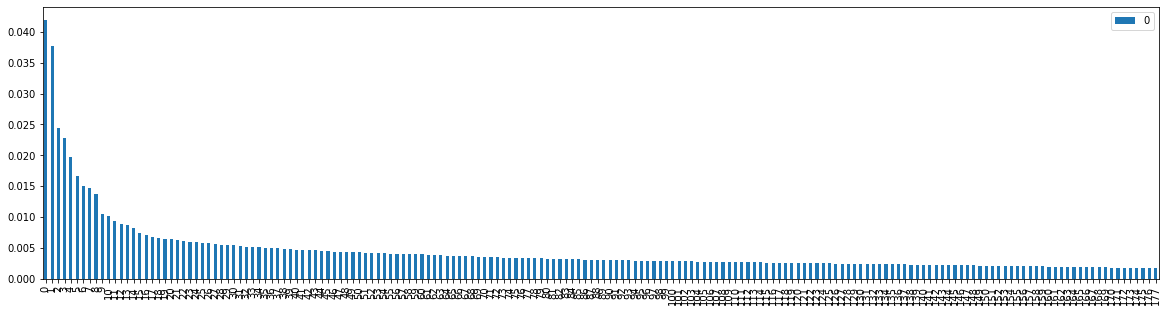

In [80]:
pd.DataFrame(pca.explained_variance_ratio_).plot(kind = 'bar',figsize=(20,5))
plt.show()

### modelling

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [82]:
X_train, X_test, y_train, y_test = train_test_split(transformedData, y, test_size=0.2, random_state=456)

In [83]:
from sklearn.linear_model import LogisticRegression
# Train a logistic regression
log_reg = LogisticRegression(max_iter = 10000).fit(X_train, y_train)
# Predict the labels
y_predicted = log_reg.predict(X_test)

# Print accuracy score and confusion matrix on test set
print('Accuracy on the test set: ', accuracy_score(y_test, y_predicted))
print(confusion_matrix(y_test, y_predicted)/len(y_test))

Accuracy on the test set:  0.7790300546448088
[[0.1010929  0.03654372 0.0239071 ]
 [0.01775956 0.56659836 0.04849727]
 [0.01502732 0.07923497 0.1113388 ]]


In [84]:
from sklearn.naive_bayes import GaussianNB

In [85]:
gnb = GaussianNB()
y_predicted = gnb.fit(X_train, y_train).predict(X_test)
print('Accuracy on the test set: ', accuracy_score(y_test, y_predicted))
print(confusion_matrix(y_test, y_predicted)/len(y_test))

Accuracy on the test set:  0.6181693989071039
[[0.10280055 0.03346995 0.02527322]
 [0.09153005 0.41120219 0.13012295]
 [0.04508197 0.05635246 0.10416667]]


Logistic Regression with K-fold cross validationn

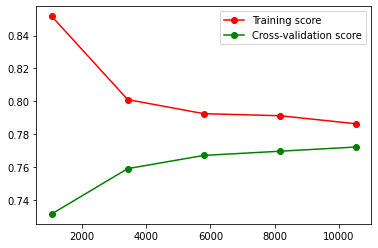

In [86]:
import sklearn as sk
# learning curve
learningCurveDT = sk.model_selection.learning_curve(estimator = sk.linear_model.LogisticRegression(max_iter=10000), X = X_train, y = y_train,
                                                     return_times = True,cv=10)
train_sizes, train_scores, test_scores, fit_times, _ = learningCurveDT
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
fit_times_mean = np.mean(fit_times, axis=1)
fit_times_std = np.std(fit_times, axis=1)
# Plot learning curve
plt.figure()
# plt.fill_between(
#     train_sizes,
#     train_scores_mean - train_scores_std,
#     train_scores_mean + train_scores_std,
#     alpha=0.1,
#     color="r",
# )
# plt.fill_between(
#     train_sizes,
#     test_scores_mean - test_scores_std,
#     test_scores_mean + test_scores_std,
#     alpha=0.1,
#     color="g",
# )
plt.plot(train_sizes, train_scores_mean, "o-", color="r", label="Training score" )
plt.plot(train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score")
plt.legend(loc="best")

MLP and KNN with various permutation of hyperparameters.

In [87]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate


In [165]:
#all permutations of neural networks
#default solver = adam default activation function = adam
nn_relu_adam = MLPClassifier(alpha= 0.001,max_iter=100,hidden_layer_sizes = (10,)) #alpha is the regularization parameter
nn_logit_adam = MLPClassifier( activation='logistic',alpha= 0.001,max_iter=100,hidden_layer_sizes = (10,)) #sigmoid activation function
nn_tanh_adam = MLPClassifier( activation='tanh',alpha= 0.001,max_iter=100,hidden_layer_sizes = (10,)) #tanh activation function
nn_relu_sgd = MLPClassifier( solver='sgd',alpha= 0.001,max_iter=100,hidden_layer_sizes = (10,)) # stochastic gradient descent to be optimized
nn_logit_sgd = MLPClassifier( activation='logistic',solver='sgd',alpha= 0.001,max_iter=100,hidden_layer_sizes = (10,))
nn_tanh_sgd = MLPClassifier( activation='tanh',solver='sgd',alpha= 0.001,max_iter=100,hidden_layer_sizes = (10,))

# all permutations knn
knn_euclid = KNeighborsClassifier(n_neighbors=5, metric='minkowski') #distance metric: Euclidean
knn_manhattan = KNeighborsClassifier(n_neighbors=5, metric='manhattan') # distance metric: Manhattan

# all permutations of logistic regression
elasticnet = sk.linear_model.LogisticRegression(penalty='elasticnet', random_state=0, solver='saga',l1_ratio=0.5,max_iter=10000) #elasticnet penalises both type 1 and type 2 errors.
lr = LogisticRegression(max_iter = 10000)
# Support Vector Machines
lsvm = sk.svm.LinearSVC(max_iter = 5000)
svm = sk.svm.SVC()
#Naive Bayes
gnb = GaussianNB()

models = [nn_relu_adam,nn_logit_adam,nn_tanh_adam,nn_relu_sgd,nn_logit_sgd,nn_tanh_sgd,knn_euclid,knn_manhattan,lr,elasticnet,lsvm,svm,gnb] # to hold all permutations of models and related parameters and hyper parameters

In [166]:
scoring = ['accuracy','f1_macro','precision_macro','recall_macro'] #metrics to evaluate classification performance
cv_results = [] # store the results against each fold
for model in models:
    cv_results.append(cross_validate(model, transformedData, y, cv= 5,return_train_score=True, scoring=scoring,return_estimator = True))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

In [106]:
cv_results

[{'estimator': [MLPClassifier(alpha=0.001, hidden_layer_sizes=(10,), max_iter=100),
   MLPClassifier(alpha=0.001, hidden_layer_sizes=(10,), max_iter=100),
   MLPClassifier(alpha=0.001, hidden_layer_sizes=(10,), max_iter=100),
   MLPClassifier(alpha=0.001, hidden_layer_sizes=(10,), max_iter=100),
   MLPClassifier(alpha=0.001, hidden_layer_sizes=(10,), max_iter=100)],
  'fit_time': array([ 9.32201362,  7.60339785,  7.81775403, 14.55621982,  7.70601249]),
  'score_time': array([0.01660037, 0.0167501 , 0.01713228, 0.01947594, 0.01662779]),
  'test_accuracy': array([0.75853825, 0.75239071, 0.72199454, 0.75478142, 0.76263661]),
  'test_f1_macro': array([0.6799353 , 0.67594559, 0.64357369, 0.67877315, 0.69249314]),
  'test_precision_macro': array([0.69337823, 0.68883746, 0.63419171, 0.70416749, 0.71400354]),
  'test_recall_macro': array([0.66893186, 0.66541516, 0.65760397, 0.66051125, 0.67606104]),
  'train_accuracy': array([0.83478484, 0.83683402, 0.83324795, 0.82983265, 0.82923497]),
  'tra

In [167]:
train_accuracy,val_accuracy,train_f1,val_f1,train_precision,val_precision,train_recall,val_recall= [],[],[],[],[],[],[],[]
for i in range(len(cv_results)):
    train_accuracy.append(cv_results[i]['train_accuracy'].mean())
    val_accuracy.append(cv_results[i]['test_accuracy'].mean())
    train_f1.append(cv_results[i]['train_f1_macro'].mean())
    val_f1.append(cv_results[i]['test_f1_macro'].mean())
    train_precision.append(cv_results[i]['train_precision_macro'].mean())
    val_precision.append(cv_results[i]['test_precision_macro'].mean())
    train_recall.append(cv_results[i]['test_recall_macro'].mean())
    val_recall.append(cv_results[i]['train_recall_macro'].mean())
train_accuracy

[0.8337260928961747,
 0.7947404371584699,
 0.811799863387978,
 0.7778859289617486,
 0.672575136612022,
 0.7820355191256831,
 0.7902151639344261,
 0.7830771857923498,
 0.7891222677595628,
 0.7889173497267759,
 0.785724043715847,
 0.874795081967213,
 0.6282103825136612]

In [168]:
performance = pd.DataFrame()
performance['model'] = ['nn_relu_adam','nn_logit_adam','nn_tanh_adam','nn_relu_sgd','nn_logit_sgd','nn_tanh_sgd','knn_euc','knn_man','LR','elasticnet','LSVM','SVM','NB']
performance['train_accuracy'] = train_accuracy
performance['val_accuracy'] =val_accuracy
performance['train_f1'] =train_f1
performance['val_f1'] =val_f1
performance['train_precision'] =train_precision
performance['val_precision'] =val_precision
performance['train_recall'] =train_recall
performance['val_recall'] =val_recall
performance

,model,train_accuracy,val_accuracy,train_f1,val_f1,train_precision,val_precision,train_recall,val_recall
0,nn_relu_adam,0.833726,0.742350,0.780210,0.674786,0.795348,0.683496,0.674739,0.767523
1,nn_logit_adam,0.794740,0.765915,0.731380,0.696278,0.745455,0.710401,0.685767,0.719606
2,nn_tanh_adam,0.811800,0.755055,0.752177,0.683625,0.768319,0.696148,0.677186,0.738943
3,nn_relu_sgd,0.777886,0.757719,0.703033,0.677456,0.726186,0.702825,0.660997,0.685739
4,nn_logit_sgd,0.672575,0.660656,0.427995,0.398609,0.676993,0.614295,0.412447,0.432432
5,nn_tanh_sgd,0.782036,0.761817,0.707098,0.680878,0.733480,0.710360,0.662274,0.688008
6,knn_euc,0.790215,0.662363,0.737749,0.590785,0.729473,0.582313,0.606727,0.750127
7,knn_man,0.783077,0.652596,0.733714,0.587584,0.721607,0.576540,0.608741,0.749648
8,LR,0.789122,0.760178,0.719541,0.679453,0.743829,0.703030,0.664626,0.701271
9,elasticnet,0.788917,0.759836,0.719066,0.678463,0.743600,0.702958,0.663137,0.700674


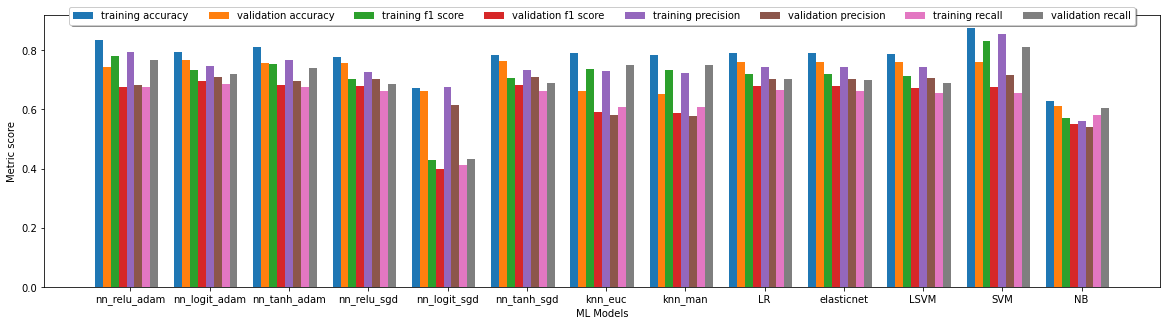

In [169]:
plt.figure(figsize=(20,5))
x = performance['model']
x_axis = np.arange(len(x))
plt.bar(x_axis-0.4,performance['train_accuracy'],label = 'training accuracy',width = 0.1)
plt.bar(x_axis-0.3, performance['val_accuracy'],label = 'validation accuracy',width = 0.1)
plt.bar(x_axis-0.2, performance['train_f1'],label = 'training f1 score',width = 0.1)
plt.bar(x_axis-0.1,performance['val_f1'],label = 'validation f1 score',width = 0.1)
plt.bar(x_axis+0, performance['train_precision'],label = 'training precision',width = 0.1)
plt.bar(x_axis+0.1, performance['val_precision'], label = 'validation precision',width = 0.1)
plt.bar(x_axis+0.2,performance['train_recall'], label = 'training recall',width = 0.1)
plt.bar(x_axis+0.3, performance['val_recall'], label = 'validation recall',width = 0.1)
plt.xticks(x_axis, x)
plt.xlabel("ML Models")
plt.ylabel("Metric score")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=8, fancybox=True, shadow=True)
plt.show()

Deep Neural Network

In [94]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from keras.utils.vis_utils import plot_model
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from tensorflow.keras import metrics
import time

In [95]:
checkpoint = ModelCheckpoint('weights.hdf5',monitor='val_loss',save_best_only=True) 
# Create the model: model
model = Sequential()

# Add the first hidden layer
model.add(Dense(100,activation='relu',input_shape =(X_train.shape[1],)))

# Add the second hidden layer
model.add(Dense(200,activation='relu'))

# Add the second hidden layer
model.add(Dense(250,activation='relu'))
model.add(Dropout(0.5)) # remove the overfitting 50 percent of weights
# Add the second hidden layer
model.add(Dense(100,activation='relu'))
model.add(Flatten()) # flatten the data
# Add the output layer
model.add(Dense(3,activation='softmax'))

# Compile the model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()
# Fit the model
history2 = model.fit(X_train,y_train,validation_split=0.3,epochs = 10,callbacks=[checkpoint])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               17900     
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 dense_2 (Dense)             (None, 250)               50250     
                                                                 
 dropout (Dropout)           (None, 250)               0         
                                                                 
 dense_3 (Dense)             (None, 100)               25100     
                                                                 
 flatten (Flatten)           (None, 100)               0         
                                                                 
 dense_4 (Dense)             (None, 3)                 3

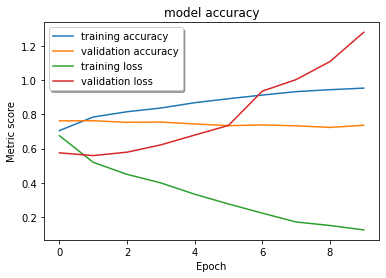

In [129]:
# plot the loss and accuracy
plt.figure()
plt.plot(history2.history['accuracy'],label='training accuracy')
plt.plot(history2.history['val_accuracy'],label='validation accuracy')
plt.plot(history2.history['loss'],label='training loss')
plt.plot(history2.history['val_loss'],label='validation loss')
plt.title('model accuracy')
plt.ylabel('Metric score')
plt.xlabel('Epoch')
plt.legend(loc='upper left',fancybox=True, shadow=True)
plt.savefig('relu_acc.jpg')

In [97]:
model = load_model('weights.hdf5')
model.evaluate(X_test,y_test)

92/92 [==============================] - 0s 2ms/step - loss: 0.5355 - accuracy: 0.7749


[0.5354795455932617, 0.7749316692352295]

# Comparative Analysis

Performance of all the models is comparable. SVM, Logistic Regression and DNN give relatively better results. We continue with Logistic Regression (simplest of all the models) to perform comparative analysis.

results without 

In [131]:
X_norm

,airline_sentiment_confidence,airline,retweet_count,length,polarity,subjectivity,aa,abl,actual,agent,...,will_tfidf,with_tfidf,work_tfidf,worst_tfidf,would_tfidf,yes_tfidf,you_tfidf,you guy_tfidf,you have_tfidf,your_tfidf
0,1.000000,-0.2,-1.0,-0.928058,0.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.0,-1.000000,-1.000000
1,-0.959098,-0.2,-1.0,-0.856115,0.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.360394,-1.0,-1.000000,-1.000000
2,0.048722,-0.2,-1.0,-0.812950,-0.390625,0.375000,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.0,-1.000000,-1.000000
3,1.000000,-0.2,-1.0,-0.726619,0.006250,-0.300000,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.0,-1.000000,-0.349267
4,1.000000,-0.2,-1.0,-0.870504,-0.350000,-0.233333,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.0,-1.000000,-1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,-0.958797,0.6,-1.0,-0.856115,0.000000,0.200000,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.570864,-1.0,-1.000000,-1.000000
14636,1.000000,0.6,-1.0,-0.654676,-0.300000,0.200000,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.0,-1.000000,-1.000000
14637,1.000000,0.6,-1.0,-0.899281,0.000000,-1.000000,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.0,-1.000000,-1.000000
14638,1.000000,0.6,-1.0,-0.611511,-0.125000,-0.250000,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.431534,-1.0,-0.275494,-0.630051


In [142]:
tfidf_reg = re.compile(r'.*_tfidf')
tfidf_features = [name for name in X_norm.columns if tfidf_reg.search(name)]
basic_features = ['airline_sentiment_confidence', 'airline', 'retweet_count', 'length', 'polarity', 'subjectivity']
bow_features = [name for name in X_norm.columns if name not in tfidf_features]
for name in basic_features:
  bow_features.remove(name)
print('length of basic features',len(basic_features))
print('length of bow features',len(bow_features))
print('length of tfidf features',len(tfidf_features))
print('total',len(tfidf_features)+len(bow_features)+len(basic_features))
feature_group = [basic_features,tfidf_features,bow_features]

length of basic features 6
length of bow features 250
length of tfidf features 250
total 506


In [154]:
data_list = [X_norm.drop(features,axis=1) for features in feature_group]
data_list.append(X_norm)

In [155]:
len(data_list)

4

In [156]:
mean_accuracies = []
for data in data_list:
  X_train0, X_test0, y_train0, y_test0 = train_test_split(data, y, test_size=0.2, random_state=456)
  X_train1, X_test1, y_train1, y_test1 = train_test_split(data, y, test_size=0.2, random_state=0)
  X_train2, X_test2, y_train2, y_test2 = train_test_split(data, y, test_size=0.2, random_state=1)
  X_train3, X_test3, y_train3, y_test3 = train_test_split(data, y, test_size=0.2, random_state=404)
  # Train a logistic regression
  accuracies = []
  print('Results for test 1')
  log_reg = LogisticRegression(max_iter = 10000).fit(X_train0, y_train0)
  # Predict the labels
  y_predicted = log_reg.predict(X_test0)

  # Print accuracy score and confusion matrix on test set
  accuracies.append(accuracy_score(y_test0, y_predicted))
  print('Accuracy on the test set: ', accuracies[0])
  # print(confusion_matrix(y_test, y_predicted)/len(y_test))
  print('*****************************************************************')

  print('Results for test 2')
  log_reg = LogisticRegression(max_iter = 10000).fit(X_train1, y_train1)
  # Predict the labels
  y_predicted = log_reg.predict(X_test1)

  # Print accuracy score and confusion matrix on test set
  accuracies.append(accuracy_score(y_test1, y_predicted))
  print('Accuracy on the test set: ', accuracy_score(y_test1, y_predicted))
  # print(confusion_matrix(y_test, y_predicted)/len(y_test))
  print('*****************************************************************')

  print('Results for test 3')
  log_reg = LogisticRegression(max_iter = 10000).fit(X_train2, y_train2)
  # Predict the labels
  y_predicted = log_reg.predict(X_test2)

  # Print accuracy score and confusion matrix on test set
  accuracies.append(accuracy_score(y_test2, y_predicted))
  print('Accuracy on the test set: ', accuracy_score(y_test2, y_predicted))
  # print(confusion_matrix(y_test, y_predicted)/len(y_test))
  print('*****************************************************************')

  print('Results for test 4')
  log_reg = LogisticRegression(max_iter = 10000).fit(X_train3, y_train3)
  # Predict the labels
  y_predicted = log_reg.predict(X_test3)

  # Print accuracy score and confusion matrix on test set
  accuracies.append(accuracy_score(y_test3, y_predicted))
  print('Accuracy on the test set: ', accuracy_score(y_test3, y_predicted))
  # print(confusion_matrix(y_test, y_predicted)/len(y_test))
  mean_accuracies.append(sum(accuracies)/len(accuracies))
  print('############################################################################')

Results for test 1
Accuracy on the test set:  0.799863387978142
*****************************************************************
Results for test 2
Accuracy on the test set:  0.7769808743169399
*****************************************************************
Results for test 3
Accuracy on the test set:  0.782103825136612
*****************************************************************
Results for test 4
Accuracy on the test set:  0.796448087431694
############################################################################


In [157]:
print(mean_accuracies)

[0.7804815573770492, 0.7593920765027322, 0.7780908469945356, 0.7888490437158471]


The mean accuracies achieved showcase that all features contribute positively to ahcieve a better performance. TfIdf seems to have more impact on the model performance as removal of tfID drastically reduces the acuracy of the model. Next is bow followed by the basic features.

## Affect of standardization, normalization and outlier removal on the model performance


In [159]:
y = final_data['airline_sentiment']
X = final_data.drop('airline_sentiment',axis =1)

In [161]:
  X_train0, X_test0, y_train0, y_test0 = train_test_split(X, y, test_size=0.2, random_state=456)
  X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=0)
  X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=1)
  X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.2, random_state=404)
  # Train a logistic regression
  accuracies = []
  print('Results for test 1')
  log_reg = LogisticRegression(max_iter = 10000).fit(X_train0, y_train0)
  # Predict the labels
  y_predicted = log_reg.predict(X_test0)

  # Print accuracy score and confusion matrix on test set
  accuracies.append(accuracy_score(y_test0, y_predicted))
  print('Accuracy on the test set: ', accuracies[0])
  # print(confusion_matrix(y_test, y_predicted)/len(y_test))
  print('*****************************************************************')

  print('Results for test 2')
  log_reg = LogisticRegression(max_iter = 10000).fit(X_train1, y_train1)
  # Predict the labels
  y_predicted = log_reg.predict(X_test1)

  # Print accuracy score and confusion matrix on test set
  accuracies.append(accuracy_score(y_test1, y_predicted))
  print('Accuracy on the test set: ', accuracy_score(y_test1, y_predicted))
  # print(confusion_matrix(y_test, y_predicted)/len(y_test))
  print('*****************************************************************')

  print('Results for test 3')
  log_reg = LogisticRegression(max_iter = 10000).fit(X_train2, y_train2)
  # Predict the labels
  y_predicted = log_reg.predict(X_test2)

  # Print accuracy score and confusion matrix on test set
  accuracies.append(accuracy_score(y_test2, y_predicted))
  print('Accuracy on the test set: ', accuracy_score(y_test2, y_predicted))
  # print(confusion_matrix(y_test, y_predicted)/len(y_test))
  print('*****************************************************************')

  print('Results for test 4')
  log_reg = LogisticRegression(max_iter = 10000).fit(X_train3, y_train3)
  # Predict the labels
  y_predicted = log_reg.predict(X_test3)

  # Print accuracy score and confusion matrix on test set
  accuracies.append(accuracy_score(y_test3, y_predicted))
  print('Accuracy on the test set: ', accuracy_score(y_test3, y_predicted))
  # print(confusion_matrix(y_test, y_predicted)/len(y_test))
  print('mean accuracy',sum(accuracies)/len(accuracies))
  print('############################################################################')

Results for test 1
Accuracy on the test set:  0.7991803278688525
*****************************************************************
Results for test 2
Accuracy on the test set:  0.7807377049180327
*****************************************************************
Results for test 3
Accuracy on the test set:  0.7776639344262295
*****************************************************************
Results for test 4
Accuracy on the test set:  0.7974726775956285
mean accuracy 0.7887636612021858
############################################################################


Negligible affect on performance is observed.